In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from   scipy.stats import ttest_1samp, ttest_ind

sns.set(color_codes=True)
%matplotlib inline 

# Shingles
## Problem Statement
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [2]:
# Importing data
shingles = pd.read_csv('22bd. A & B shingles-1.csv')

## Descriptive Analytics
-----

In [3]:
# Check if data is imported correctly
shingles

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [5]:
# Check for the first 10 entries in the data
shingles.head(10)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [6]:
# Getting the number of rows and columns
shingles.shape

(36, 2)

In [17]:
# Getting the overall information of the dataset
shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [18]:
# The five number summary
shingles.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


Text(0.5, 0, 'Mean moisture per 100 sqft')

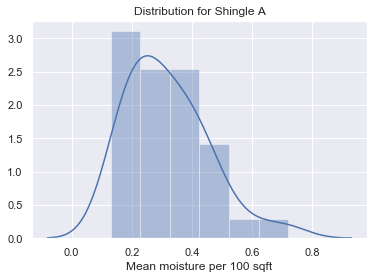

In [16]:
# Plotting the distribution
sns.distplot(shingles['A'])
plt.title('Distribution for Shingle A')
plt.xlabel('Mean moisture per 100 sqft')

Text(0.5, 0, 'Mean moisture per 100 sqft')

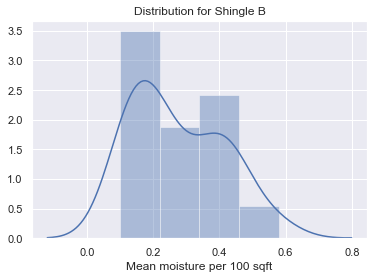

In [19]:
sns.distplot(shingles['B'])
plt.title('Distribution for Shingle B')
plt.xlabel('Mean moisture per 100 sqft')

### Initial Observations:
1. Both the shingles are left skewed.
2. Shingle A has 36 observations and Shingle B has 31 observations.
3. μ < 0.35 pound per 100 sqft

# -------------------------------------------------------------------------------------------
### Question 1
3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.


#### To show that Shingle A is within permissible limits:

We are not provided with poulation standard deviation so we will perform single sample T-test.

* $H_0$: $\mu$ $\geq$ 0.35
* $H_A$: $\mu$ $<$ 0.35

#### Lets assume a confidence level of 95%
α = 0.05

#### It is a left tailed test

In [41]:
t_statistic, p_value = ttest_1samp(shingles['A'], 0.35)
print('One sample t test \np value: {0} '.format(p_value/2)) # Divide p value by 2 for a one tailed

One sample t test 
p value: 0.07477633144907513 


Since p value is 7.4%, we fail to reject the Null hypothesis.

### So stastically we fail to reject the null hypothesis which shows that Shingle A is not less than 0.35 pounds (exceeding permissible limits) per 100sqft with a confidence level of 95%.
-----

#### To show that Shingle B is within permissible limits:

We are not provided with poulation standard deviation so we will perform single sample T-test.

* $H_0$: $\mu$ $\geq$ 0.35
* $H_B$: $\mu$ $<$ 0.35

#### Lets assume a confidence level of 95%
α = 0.05

#### It is a left tailed test

In [43]:
shingle_b = shingles['B'].dropna()
t_statistic, p_value = ttest_1samp(shingle_b, 0.35)
print('One sample t test\np value: {0} '.format(p_value/2)) # Divide p value by 2 for a one tailed

One sample t test
p value: 0.0020904774003191813 


Since p value is 0.2%, we reject the Null hypothesis.

### So stastically we reject the null hypothesis which shows that Shingle B is less than 0.35 pounds (within permissible limits) per 100sqft with a confidence level of 95%

# -------------------------------------------------------------------------------------------
### Question 2:

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### Assumptions:
-	Shingle A and B are 2 independent samples of 2 shingles.
-	Since the deviation of the population is not given we will proceed with 2 sample t test
-	Let us take the confidence interval of 95%. Hence α = 0.05
-	μA  is the population mean of Shingle A and μB is the population mean of Shingle B.
-	Assuming that I want to prove that the population means are not equal. I formulate the below hypothesis.

#### Hypothesis:
Assuming, I believe that the mean of both the shingles are not equal. 
* $H_0$: $\mu_A$ $=$ $\mu_B$
* $H_a$: $\mu_A$ $≠$ $\mu_B$

#### Lets assume a confidence level of 95%
α = 0.05

#### Two Tailed Two Sample T test

In [47]:
t_statistic, p_value  = ttest_ind(shingles['A'],shingle_b)
print('p Value :',p_value)    

p Value : 0.2017496571835328


Since the p value is 20%, which is greater than 5%, we will fail to reject the Null Hypothesis
### The population means of both the shingles are equal at a confidence interval of 95%.

# -------------------------------------------------------------------------------------------